In [28]:
# load the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# load the data
dataset = pd.read_excel('/Users/chirath/Python/IIT/Waste_Management_System-DSGP-/ALL/Dataset22-24.xlsx')
  

In [30]:
# load the data
dataset.head()

,Dump Date,Vehicle No,Out Time,SOW Wastage Amount (Kg),MSW Wastage Amount (Kg),Induastrial Wastage (Kg),Other Amount (Kg),Remarks,Bill No,Muster,Route
0,2022-01-01,ZA-6994,13:55:00,3200,NaN,NaN,NaN,NaN,437978,KOHUWALA,01 - VILAWALA
1,2022-01-01,RD-1607,12:24:00,2480,NaN,NaN,NaN,NaN,437917,DEHIWALA TOWN,08 - DEHIWALA WEST
2,2022-01-01,RC-8872,13:24:00,2380,NaN,NaN,NaN,NaN,437950,DEHIWALA TOWN,08 - DEHIWALA WEST
3,2022-01-01,226-2064,09:42:00,NaN,1180,NaN,NaN,NaN,437855,DEHIWALA TOWN,07 - GALWALA
4,2022-01-01,49-6548,13:04:00,1190,NaN,NaN,NaN,NaN,437938,ATTIDIYA,25 - ATTIDIYA SOUTH


In [31]:
dataset.tail()

,Dump Date,Vehicle No,Out Time,SOW Wastage Amount (Kg),MSW Wastage Amount (Kg),Induastrial Wastage (Kg),Other Amount (Kg),Remarks,Bill No,Muster,Route
55170,2024-09-30,226-2046,09:56:00,2840,NaN,NaN,NaN,Karagampitiya Pola,610891,KARAGAMPITIYA,12 - MALWATTA
55171,2024-09-30,226-2046,15:18:00,NaN,1350,NaN,NaN,NaN,611019,KARAGAMPITIYA,12 - MALWATTA
55172,2024-09-30,226-2064,16:38:00,2270,NaN,NaN,NaN,NaN,611059,DEHIWALA TOWN,07 - GALWALA
55173,2024-09-30,RA-9799,12:45:00,NaN,1240,NaN,NaN,NaN,610947,KARAGAMPITIYA,14 - KARAGAMPITIYA
55174,2024-09-30,49-6544,15:38:00,1480,NaN,NaN,NaN,NaN,611024,R 02,29B - BORUPANA


In [32]:
# identify the number of rows and columns
print("The number of rows in the dataset is: ", dataset.shape[0])
print("The number of columns in the dataset is: ", dataset.shape[1])

The number of rows in the dataset is:  55175
The number of columns in the dataset is:  11


In [33]:
#identify the data types of the columns (features)
print("The data types of the columns in the january 2023 dataset are: ")
print(dataset.dtypes)

The data types of the columns in the january 2023 dataset are: 
Dump Date                   datetime64[ns]
Vehicle No                          object
Out Time                            object
SOW Wastage Amount (Kg)             object
MSW Wastage Amount (Kg)             object
Induastrial Wastage (Kg)           float64
Other Amount (Kg)                   object
Remarks                             object
Bill No                             object
Muster                              object
Route                               object
dtype: object


In [34]:
# Define the default columns
default_columns = [
    'Dump Date', 'Vehicle No', 'Out Time', 'SOW Wastage Amount (Kg)', 
    'MSW Wastage Amount (Kg)', 'Induastrial Wastage (Kg)', 'Other Amount (Kg)', 
    'Remarks', 'Bill No', 'Muster', 'Route'
]

# Function to check if columns exist in the dataset
def check_columns_exist(df, columns):
    for column in columns:
        if column in df.columns:
            print(f"{column}: yes")
        else:
            print(f"{column}: no")

check_columns_exist(dataset, default_columns)

Dump Date: yes
Vehicle No: yes
Out Time: yes
SOW Wastage Amount (Kg): yes
MSW Wastage Amount (Kg): yes
Induastrial Wastage (Kg): yes
Other Amount (Kg): yes
Remarks: yes
Bill No: yes
Muster: yes
Route: yes


In [35]:
# Keep only the default columns
dataset = dataset[default_columns]
print(dataset.dtypes)

Dump Date                   datetime64[ns]
Vehicle No                          object
Out Time                            object
SOW Wastage Amount (Kg)             object
MSW Wastage Amount (Kg)             object
Induastrial Wastage (Kg)           float64
Other Amount (Kg)                   object
Remarks                             object
Bill No                             object
Muster                              object
Route                               object
dtype: object


In [36]:
# indentify the missing values
print("The missing values in the  dataset are: ")
print(dataset.isnull().sum())

The missing values in the  dataset are: 
Dump Date                       0
Vehicle No                      9
Out Time                     2014
SOW Wastage Amount (Kg)     34905
MSW Wastage Amount (Kg)     20455
Induastrial Wastage (Kg)    55160
Other Amount (Kg)           55075
Remarks                     54205
Bill No                        42
Muster                          8
Route                           7
dtype: int64


In [37]:
# identify the duplicate rows in the dataset and what are them
print("The number of duplicate rows in the  dataset is: ", dataset.duplicated().sum())
dataset[dataset.duplicated()]

The number of duplicate rows in the  dataset is:  1


,Dump Date,Vehicle No,Out Time,SOW Wastage Amount (Kg),MSW Wastage Amount (Kg),Induastrial Wastage (Kg),Other Amount (Kg),Remarks,Bill No,Muster,Route
40421,2023-02-01,LM-5358,12:53:00,NaN,1490,NaN,NaN,NaN,502074,KOHUWALA,02 - DUTUGAMUNU


In [38]:
# drop the duplicate rows
dataset = dataset.drop_duplicates()

In [39]:
# check the number of rows and columns after removing the duplicates
print("The number of rows in the  dataset after removing duplicates is: ", dataset.shape[0])

The number of rows in the  dataset after removing duplicates is:  55174


In [40]:
# check the missing values after removing the duplicates
print("The missing values in the dataset after removing duplicates are: ")
dataset.isnull().sum()

The missing values in the dataset after removing duplicates are: 


Dump Date                       0
Vehicle No                      9
Out Time                     2014
SOW Wastage Amount (Kg)     34904
MSW Wastage Amount (Kg)     20455
Induastrial Wastage (Kg)    55159
Other Amount (Kg)           55074
Remarks                     54204
Bill No                        42
Muster                          8
Route                           7
dtype: int64

In [41]:
dataset['Muster'] = dataset['Muster'].str.strip()

In [42]:
# check the instances for Dump Date
dataset['Dump Date'].value_counts()

2024-03-27    102
2024-01-17    101
2024-06-19    101
2024-02-03    101
2022-08-18    100
             ... 
2022-05-10      1
2203-12-20      1
2203-11-09      1
2203-11-02      1
2024-01-25      1
Name: Dump Date, Length: 867, dtype: int64

Attempting correct the miss typed dates 

2203 to 2023

In [43]:
dataset['Dump Date'].astype(str).str.contains('2023').sum()

19426

In [44]:
# how many dates are there in the dataset that from year 2203
dataset['Dump Date'].astype(str).str.contains('2203').sum()

25

In [45]:
# Correct the year from 2203 to 2023
dataset['Dump Date'] = pd.to_datetime(dataset['Dump Date'], errors='coerce')
dataset.loc[dataset['Dump Date'].dt.year == 2203, 'Dump Date'] = dataset['Dump Date'].apply(lambda x: x.replace(year=2023) if pd.notnull(x) and x.year == 2203 else x)

# Verify the correction
print(dataset['Dump Date'].value_counts())

2024-03-27    102
2024-01-17    101
2024-06-19    101
2023-10-18    101
2024-02-03    101
             ... 
2001-07-18      1
2022-10-12      1
2025-01-05      1
2204-01-13      1
2024-01-25      1
Name: Dump Date, Length: 849, dtype: int64


In [46]:
dataset['Dump Date'].astype(str).str.contains('2203').sum()

0

In [47]:
dataset['Dump Date'].astype(str).str.contains('2023').sum()

19451

2204 to 2024

In [48]:
dataset['Dump Date'].astype(str).str.contains('2024').sum()

16583

In [49]:
dataset['Dump Date'].astype(str).str.contains('2204').sum()

74

In [50]:
# Correct the year from 2204 to 2024
dataset['Dump Date'] = pd.to_datetime(dataset['Dump Date'], errors='coerce')
dataset.loc[dataset['Dump Date'].dt.year == 2204, 'Dump Date'] = dataset['Dump Date'].apply(lambda x: x.replace(year=2024) if pd.notnull(x) and x.year == 2204 else x)

# Verify the correction
print(dataset['Dump Date'].value_counts())

2024-02-03    102
2024-03-27    102
2024-06-19    101
2023-10-18    101
2024-01-17    101
             ... 
2022-08-27      1
2022-08-17      1
2022-05-10      1
2025-01-05      1
2022-07-06      1
Name: Dump Date, Length: 825, dtype: int64


In [51]:
dataset['Dump Date'].astype(str).str.contains('2204').sum()

0

In [52]:
dataset['Dump Date'].astype(str).str.contains('2024').sum()

16657

In [53]:
print(dataset['Dump Date'].value_counts())

2024-02-03    102
2024-03-27    102
2024-06-19    101
2023-10-18    101
2024-01-17    101
             ... 
2022-08-27      1
2022-08-17      1
2022-05-10      1
2025-01-05      1
2022-07-06      1
Name: Dump Date, Length: 825, dtype: int64


In [54]:
dataset['Dump Date'].astype(str).str.contains('2025').sum()

1

In [55]:
# remove the rows that contain the year 2025
dataset = dataset[~dataset['Dump Date'].astype(str).str.contains('2025')]

In [56]:
print(dataset['Dump Date'].value_counts())

2024-02-03    102
2024-03-27    102
2024-06-19    101
2023-10-18    101
2024-01-17    101
             ... 
2022-11-07      1
2022-11-06      1
2023-01-06      1
2022-05-10      1
2022-10-12      1
Name: Dump Date, Length: 824, dtype: int64


In [57]:
# remove the rows that contain the year 2001
dataset['Dump Date'].astype(str).str.contains('2001').sum()

2

In [58]:
# remove the rows that contain the year 2001
dataset = dataset[~dataset['Dump Date'].astype(str).str.contains('2001')]

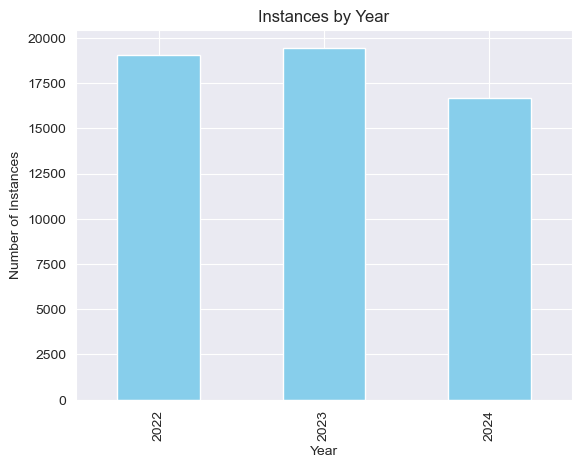

In [59]:
# check the instances for Dump Date using plot by year
dataset['Dump Date'].dt.year.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Instances')
plt.title('Instances by Year')
plt.show()

In [60]:
# dataset data types
print(dataset.dtypes)

Dump Date                   datetime64[ns]
Vehicle No                          object
Out Time                            object
SOW Wastage Amount (Kg)             object
MSW Wastage Amount (Kg)             object
Induastrial Wastage (Kg)           float64
Other Amount (Kg)                   object
Remarks                             object
Bill No                             object
Muster                              object
Route                               object
dtype: object


In [61]:
# check the instances for Dump Date
dataset['Dump Date'].value_counts()

2024-02-03    102
2024-03-27    102
2024-06-19    101
2024-01-17    101
2023-10-18    101
             ... 
2023-01-06      1
2022-07-06      1
2023-05-17      1
2022-11-07      1
2022-11-06      1
Name: Dump Date, Length: 822, dtype: int64

In [62]:
# set the time to 00:00:00 for each date
dataset['Dump Date'] = dataset['Dump Date'].dt.normalize()

In [63]:
dataset.isnull().sum()

Dump Date                       0
Vehicle No                      9
Out Time                     2014
SOW Wastage Amount (Kg)     34904
MSW Wastage Amount (Kg)     20452
Induastrial Wastage (Kg)    55156
Other Amount (Kg)           55071
Remarks                     54201
Bill No                        42
Muster                          8
Route                           7
dtype: int64

In [64]:
# order the dataset by Dump Date
dataset = dataset.sort_values(by='Dump Date')

In [65]:
dataset['Muster'] = dataset['Muster'].str.strip()

In [66]:
# check the instances for Muster
dataset['Muster'].value_counts()

R 02                8215
R 01                5969
BADOWITA            5234
MOUNT LAVINIA       5208
KOHUWALA            4767
D 02 PARK           4578
KARAGAMPITIYA       4202
ATTIDIYA            4093
DEHIWALA TOWN       3486
NEDIMALA            3380
SARANANKARA         3228
DEHIWALA MARKET     2291
ATTITIYA             127
KARAGAMPIRIYA        113
KOHUWANA             105
MOUNT LAVNINA         99
DEBHIWALA MARKET      61
SARABABKARA            5
DEHIWALA MERKET        1
R 03                   1
Name: Muster, dtype: int64

In [67]:
muster_corrections = {
    'KARAGAMPIRIYA': 'KARAGAMPITIYA',
    'ATTITIYA': 'ATTIDIYA',
    'MOUNT LAVNINA': 'MOUNT LAVINIA',
    'KOHUWANA': 'KOHUWALA',
    'SARABABKARA': 'SARANANKARA',
    'DEHIWALA MERKET': 'DEHIWALA MARKET',
    'DEBHIWALA MARKET': 'DEHIWALA MARKET'


    

}
dataset['Muster'] = dataset['Muster'].replace(muster_corrections)

# check the instances for Muster
print(dataset['Muster'].value_counts())

R 02               8215
R 01               5969
MOUNT LAVINIA      5307
BADOWITA           5234
KOHUWALA           4872
D 02 PARK          4578
KARAGAMPITIYA      4315
ATTIDIYA           4220
DEHIWALA TOWN      3486
NEDIMALA           3380
SARANANKARA        3233
DEHIWALA MARKET    2353
R 03                  1
Name: Muster, dtype: int64


In [68]:
dataset['Route'] = dataset['Route'].str.strip()

In [69]:
dataset['Route'].value_counts()

20 - KATUKURUNDUWATTA    3299
29B - BORUPANA           2585
08 - DEHIWALA WEST       2437
29A - KANDAWALA          2392
13 - JAYATHILAKA         2354
09 - DEHIWALA EAST       2270
10 - UDYANAYA            2242
23 - WEDIKANDA           2219
11 - NEDIMALA            2136
21 - ATTIDIYA NORTH      2124
16 - KAWDANA WEST        2112
25 - ATTIDIYA SOUTH      2096
19 - WATARAPPOLA         2070
14 - KARAGAMPITIYA       2021
02/03 - EKABADDA         1967
15B - KAWDANA EAST       1935
18 - VIDYALAYA           1467
04 - KALUBOWILA          1211
28 - RATMALANA EAST      1181
05/06 - EKABADDA         1173
12 - MALWATTA            1150
24 - PIRIVENA            1150
15A - KAWDANA EAST       1144
22 - WATHUMULLA          1136
06 - SARANANKARA         1112
17 - GALKISSA            1088
07 - GALWALA             1048
26 - VIHARA              1033
27 - RATMALANA WEST       989
03 - KOHUWALA             964
01 - VILAWALA             955
05 - HATHBODIYA           948
02 - DUTUGAMUNU           681
02 DUTUGEM

In [70]:
route_corrections = {
    '02 DUTUGEMUNU': '02 - DUTUGAMUNU',
    '02 DUTUGEMUN': '02 - DUTUGAMUNU',
    '02  DUTUGEMUNU': '02 - DUTUGAMUNU',
    '01 - VILAVALA':'01 - VILAWALA',
    '09 DENIWALA EAST':'09 - DEHIWALA EAST',
    '17- GALKISSA':'17 - GALKISSA',
    '26 VIHARA': '26 - VIHARA'



}

# Replace incorrect names with correct names
dataset['Route'] = dataset['Route'].replace(route_corrections)

# Verify the corrections
print(dataset['Route'].value_counts())

20 - KATUKURUNDUWATTA    3299
29B - BORUPANA           2585
08 - DEHIWALA WEST       2437
29A - KANDAWALA          2392
13 - JAYATHILAKA         2354
09 - DEHIWALA EAST       2336
10 - UDYANAYA            2242
23 - WEDIKANDA           2219
11 - NEDIMALA            2136
21 - ATTIDIYA NORTH      2124
16 - KAWDANA WEST        2112
25 - ATTIDIYA SOUTH      2096
19 - WATARAPPOLA         2070
14 - KARAGAMPITIYA       2021
02/03 - EKABADDA         1967
15B - KAWDANA EAST       1935
18 - VIDYALAYA           1467
04 - KALUBOWILA          1211
28 - RATMALANA EAST      1181
05/06 - EKABADDA         1173
12 - MALWATTA            1150
24 - PIRIVENA            1150
15A - KAWDANA EAST       1144
22 - WATHUMULLA          1136
17 - GALKISSA            1125
06 - SARANANKARA         1112
26 - VIHARA              1067
07 - GALWALA             1048
01 - VILAWALA             992
27 - RATMALANA WEST       989
03 - KOHUWALA             964
05 - HATHBODIYA           948
02 - DUTUGAMUNU           948
04 & 11 EK

In [71]:
# remove the instances with Muster == R 03 
dataset = dataset[dataset['Muster'] != 'R 03']
# remove the instances with Route (04 & 11 EKABADDA, 04/11 EKABADDA, 02/EKABADDA)
dataset = dataset[dataset['Route'] != '04 & 11 EKABADDA']
dataset = dataset[dataset['Route'] != '04/11 EKABADDA']
dataset = dataset[dataset['Route'] != '02/EKABADDA']

In [72]:
print(dataset['Route'].value_counts())

20 - KATUKURUNDUWATTA    3299
29B - BORUPANA           2585
08 - DEHIWALA WEST       2437
29A - KANDAWALA          2392
13 - JAYATHILAKA         2354
09 - DEHIWALA EAST       2336
10 - UDYANAYA            2242
23 - WEDIKANDA           2219
11 - NEDIMALA            2136
21 - ATTIDIYA NORTH      2124
16 - KAWDANA WEST        2112
25 - ATTIDIYA SOUTH      2096
19 - WATARAPPOLA         2070
14 - KARAGAMPITIYA       2021
02/03 - EKABADDA         1967
15B - KAWDANA EAST       1935
18 - VIDYALAYA           1467
04 - KALUBOWILA          1211
28 - RATMALANA EAST      1181
05/06 - EKABADDA         1173
12 - MALWATTA            1150
24 - PIRIVENA            1149
15A - KAWDANA EAST       1144
22 - WATHUMULLA          1136
17 - GALKISSA            1125
06 - SARANANKARA         1112
26 - VIHARA              1067
07 - GALWALA             1048
01 - VILAWALA             992
27 - RATMALANA WEST       989
03 - KOHUWALA             964
05 - HATHBODIYA           948
02 - DUTUGAMUNU           948
Name: Rout

In [73]:
print(dataset['Muster'].value_counts())

R 02               8215
R 01               5969
MOUNT LAVINIA      5307
BADOWITA           5234
KOHUWALA           4871
D 02 PARK          4578
KARAGAMPITIYA      4315
ATTIDIYA           4220
DEHIWALA TOWN      3486
NEDIMALA           3347
SARANANKARA        3233
DEHIWALA MARKET    2353
Name: Muster, dtype: int64


In [74]:
# Define the default routes
default_routes = [
    '20 - KATUKURUNDUWATTA', '29A - KANDAWALA', '29B - BORUPANA', '08 - DEHIWALA WEST', 
    '13 - JAYATHILAKA', '21 - ATTIDIYA NORTH', '25 - ATTIDIYA SOUTH', '02/03 - EKABADDA', 
    '11 - NEDIMALA', '16 - KAWDANA WEST', '10 - UDYANAYA', '19 - WATARAPPOLA', 
    '23 - WEDIKANDA', '09 - DEHIWALA EAST', '14 - KARAGAMPITIYA', '18 - VIDYALAYA', 
    '15B - KAWDANA EAST', '06 - SARANANKARA', '24 - PIRIVENA', '12 - MALWATTA', 
    '04 - KALUBOWILA', '05/06 - EKABADDA', '28 - RATMALANA EAST', '22 - WATHUMULLA', 
    '15A - KAWDANA EAST', '05 - HATHBODIYA', '27 - RATMALANA WEST', '03 - KOHUWALA'
]

# Function to check if routes exist in the dataset
def check_routes_exist(df, routes):
    for route in routes:
        if route in df['Route'].values:
            print(f"{route}: yes")
        else:
            print(f"{route}: no")

# Check the routes
check_routes_exist(dataset, default_routes)

20 - KATUKURUNDUWATTA: yes
29A - KANDAWALA: yes
29B - BORUPANA: yes
08 - DEHIWALA WEST: yes
13 - JAYATHILAKA: yes
21 - ATTIDIYA NORTH: yes
25 - ATTIDIYA SOUTH: yes
02/03 - EKABADDA: yes
11 - NEDIMALA: yes
16 - KAWDANA WEST: yes
10 - UDYANAYA: yes
19 - WATARAPPOLA: yes
23 - WEDIKANDA: yes
09 - DEHIWALA EAST: yes
14 - KARAGAMPITIYA: yes
18 - VIDYALAYA: yes
15B - KAWDANA EAST: yes
06 - SARANANKARA: yes
24 - PIRIVENA: yes
12 - MALWATTA: yes
04 - KALUBOWILA: yes
05/06 - EKABADDA: yes
28 - RATMALANA EAST: yes
22 - WATHUMULLA: yes
15A - KAWDANA EAST: yes
05 - HATHBODIYA: yes
27 - RATMALANA WEST: yes
03 - KOHUWALA: yes


In [75]:
# Define the default musters
default_musters = [
    'R 02', 'R 01', 'MOUNT LAVINIA', 'KOHUWALA', 'BADOWITA', 
    'ATTIDIYA', 'KARAGAMPITIYA', 'D 02 PARK', 'DEHIWALA TOWN', 
    'SARANANKARA', 'NEDIMALA', 'DEHIWALA MARKET'
]

# Function to check if musters exist in the dataset
def check_musters_exist(df, musters):
    for muster in musters:
        if muster in df['Muster'].values:
            print(f"{muster}: yes")
        else:
            print(f"{muster}: no")

# Check the musters
check_musters_exist(dataset, default_musters)

R 02: yes
R 01: yes
MOUNT LAVINIA: yes
KOHUWALA: yes
BADOWITA: yes
ATTIDIYA: yes
KARAGAMPITIYA: yes
D 02 PARK: yes
DEHIWALA TOWN: yes
SARANANKARA: yes
NEDIMALA: yes
DEHIWALA MARKET: yes


In [76]:
# Dropping unnecessary columns
columns_to_drop = ['Vehicle No', 'Out Time', 'Remarks', 'Bill No', 'Induastrial Wastage (Kg)', 'Other Amount (Kg)', 'Remarks']
dataset = dataset.drop(columns=columns_to_drop)
print(dataset.head(10))

    Dump Date SOW Wastage Amount (Kg) MSW Wastage Amount (Kg)  \
0  2022-01-01                    3200                     NaN   
29 2022-01-01                     NaN                    1710   
30 2022-01-01                    1160                     NaN   
31 2022-01-01                     NaN                    2090   
32 2022-01-01                     960                     NaN   
33 2022-01-01                     NaN                    1360   
34 2022-01-01                    1350                     NaN   
35 2022-01-01                    2520                     NaN   
36 2022-01-01                    2450                     NaN   
37 2022-01-01                    2790                     NaN   

             Muster               Route  
0          KOHUWALA       01 - VILAWALA  
29    MOUNT LAVINIA    19 - WATARAPPOLA  
30             R 01      18 - VIDYALAYA  
31             R 01      18 - VIDYALAYA  
32  DEHIWALA MARKET    13 - JAYATHILAKA  
33  DEHIWALA MARKET    13 - JAYA

In [77]:
# Convert wastage amount columns to numeric
dataset['SOW Wastage Amount (Kg)'] = pd.to_numeric(dataset['SOW Wastage Amount (Kg)'], errors='coerce')
dataset['MSW Wastage Amount (Kg)'] = pd.to_numeric(dataset['MSW Wastage Amount (Kg)'], errors='coerce')

# Group and sum the wastage amounts
df_grouped = dataset.groupby(['Dump Date', 'Route', 'Muster']).agg({
    'SOW Wastage Amount (Kg)': 'sum',
    'MSW Wastage Amount (Kg)': 'sum'
}).reset_index()
print(df_grouped.head())

   Dump Date             Route    Muster  SOW Wastage Amount (Kg)  \
0 2022-01-01     01 - VILAWALA  KOHUWALA                   3200.0   
1 2022-01-01   02 - DUTUGAMUNU  KOHUWALA                   1820.0   
2 2022-01-01  02/03 - EKABADDA  KOHUWALA                   2150.0   
3 2022-01-01     03 - KOHUWALA  KOHUWALA                   3480.0   
4 2022-01-01   04 - KALUBOWILA  NEDIMALA                   2380.0   

   MSW Wastage Amount (Kg)  
0                      0.0  
1                      0.0  
2                    970.0  
3                      0.0  
4                      0.0  


In [ ]:
# Save the cleaned dataset
df_grouped.to_csv('/Users/chirath/Python/IIT/Waste_Management_System-DSGP-/ALL/Dataset22-24_cleaned.csv', index=False)